In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Model 3

    Dense Layers(Also known as fully connected layers) = 2, epochs = 500

In [23]:
# Lets Create a dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [24]:
len(X)

50

In [25]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [26]:
# Training Data
X_train = X[:40]
y_train = y[:40]

# Testing Data
X_test = X[40:]
y_test = y[40:]

In [27]:
X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [37]:
# Lets build a model

# Set seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
], name = "Tensorflow_35")

# 2. Compile a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 20.1281 - mae: 20.1281
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 21.6587 - mae: 21.6587
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 27.2792 - mae: 27.2792
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 12.9083 - mae: 12.9083
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 16.3573 - mae: 16.3573
Epoch 6/500
2/2 [==============================] - 0s 0s/step - loss: 11.1350 - mae: 11.1350
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 12.1538 - mae: 12.1538
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 10.9115 - mae: 10.9115
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 38.0142 - mae: 38.0142
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 25.5975 - mae: 25.5975
Epoch 11/500
2/2 [==============================] - 0s 0s/step 

In [38]:
model_3.summary()

Model: "Tensorflow_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Predictions
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 39ms/step


array([[15.893557],
       [16.65428 ],
       [17.415   ],
       [18.175722],
       [18.936443],
       [19.697166],
       [20.457886],
       [21.218607],
       [21.97933 ],
       [22.740051]], dtype=float32)

In [40]:
y_true = y_test
y_true

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [41]:
# Functions for evaluating our model
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

In [46]:
# Function for plotting predictions

def plot_preds(train_data = X_train,
               test_data = X_test,
               train_label = y_train,
               test_label = y_test,
               predictions = y_pred_3):
    
    # Plot 
    plt.figure(figsize=(15,10))
    
    # Plot the training data in light green(lime)
    plt.scatter(train_data, train_label, label="Training Data", c="lime")
    
    # Plot the testing data in cyan
    plt.scatter(test_data, test_label, label="Testing Data", c="cyan")
    
    # Plot the predictions in orange
    plt.scatter(test_data, predictions, label="Predictions", c="orange")
    
    # Legend
    plt.legend()
    
    plt.show()

In [47]:
mse_3 = mse(y_test, y_pred_3)
mse_3

<tf.Tensor: shape=(), dtype=float32, numpy=4803.948>

In [48]:
mae_3 = mae(y_test, y_pred_3)
mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=68.68319>

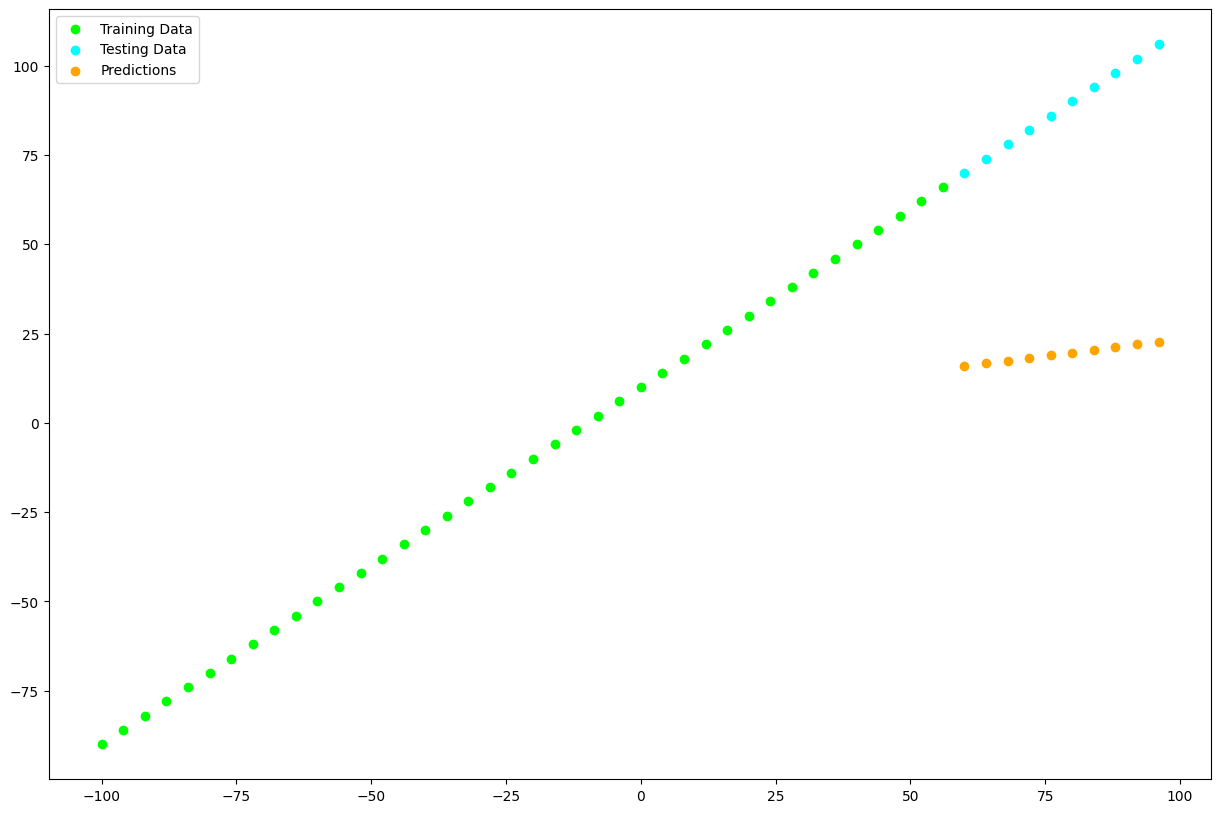

In [49]:
plot_preds(predictions=y_pred_3)